<a href="https://colab.research.google.com/github/cecilylynn/data-science-projects/blob/main/Ultimatum_MoMO_Follower_Counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
#my usual data science toolbox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [101]:
#other imports
from datetime import datetime, timedelta

from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.pyplot import figure

In [102]:
#let's read in our data:
from google.colab import drive
drive.mount('/content/drive')

# Read in the csv file
daily_df = pd.read_csv('/content/drive/My Drive/Python/Ultimatum (Marry or Move On) S2/Ultimatum_preshow.txt',
                       sep=';',
                       parse_dates=['Date'],
                       na_values=[' ','  '])

#getting rid of commas in numerical strings to change them to floats later
daily_df.replace(',','',regex=True,inplace=True)

#changing strings to numbers
daily_df[list(daily_df)[1:]]=daily_df[list(daily_df)[1:]].astype(float)

#get rid of spaces in the column names
daily_df.columns = daily_df.columns.str.replace(' ', '')

daily_df_filled = daily_df.fillna(method='ffill', axis = 0)

#use Date as the index
daily_df_filled.set_index('Date', inplace = True)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
df=daily_df_filled.drop('ultimatum', axis=1)

In [104]:
df

,Lisa,Brian,James,Ryann,Trey,Riah,Kat,Alex,Antonio,Roxanne
Date,,,,,,,,,,
2023-07-26,17252.0,3356.0,974.0,1892.0,1213.0,4867.0,1287.0,NaN,1382.0,15972.0
2023-07-27,17263.0,3371.0,981.0,1897.0,1222.0,4873.0,1296.0,NaN,1391.0,15990.0
2023-07-28,17064.0,3372.0,985.0,1905.0,1226.0,4878.0,1300.0,NaN,1397.0,16023.0
2023-07-29,17160.0,3409.0,983.0,1909.0,1224.0,4878.0,1355.0,NaN,1397.0,16025.0
2023-07-30,17166.0,3412.0,984.0,1911.0,1226.0,4878.0,1364.0,NaN,1398.0,16025.0
2023-07-31,17167.0,3415.0,983.0,1911.0,1227.0,4881.0,1369.0,NaN,1399.0,16022.0
2023-08-01,17174.0,3417.0,983.0,1914.0,1229.0,4881.0,1371.0,NaN,1400.0,16020.0
2023-08-02,17179.0,3416.0,984.0,1915.0,1229.0,4881.0,1371.0,NaN,1400.0,16021.0
2023-08-03,17179.0,3413.0,985.0,1917.0,1231.0,4880.0,1372.0,NaN,1408.0,16025.0


In [105]:
sns.set_palette('dark')

In [106]:

df.head()

,Lisa,Brian,James,Ryann,Trey,Riah,Kat,Alex,Antonio,Roxanne
Date,,,,,,,,,,
2023-07-26,17252.0,3356.0,974.0,1892.0,1213.0,4867.0,1287.0,NaN,1382.0,15972.0
2023-07-27,17263.0,3371.0,981.0,1897.0,1222.0,4873.0,1296.0,NaN,1391.0,15990.0
2023-07-28,17064.0,3372.0,985.0,1905.0,1226.0,4878.0,1300.0,NaN,1397.0,16023.0
2023-07-29,17160.0,3409.0,983.0,1909.0,1224.0,4878.0,1355.0,NaN,1397.0,16025.0
2023-07-30,17166.0,3412.0,984.0,1911.0,1226.0,4878.0,1364.0,NaN,1398.0,16025.0


<Axes: xlabel='Date'>

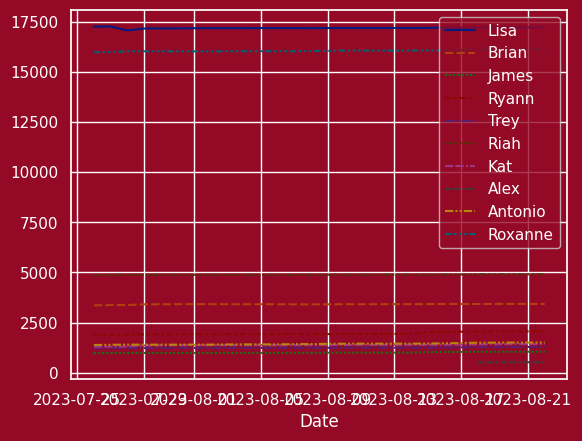

In [107]:
sns.lineplot(data=df)

In [108]:
preshow_df = pd.DataFrame({'Name': [name for name in df.columns],
                           'preshow_count' : [(df[name][-1]) for name in df.columns]})

In [109]:
preshow_df

,Name,preshow_count
0,Lisa,17211.0
1,Brian,3426.0
2,James,1045.0
3,Ryann,2064.0
4,Trey,1283.0
5,Riah,4905.0
6,Kat,1426.0
7,Alex,524.0
8,Antonio,1506.0
9,Roxanne,16116.0


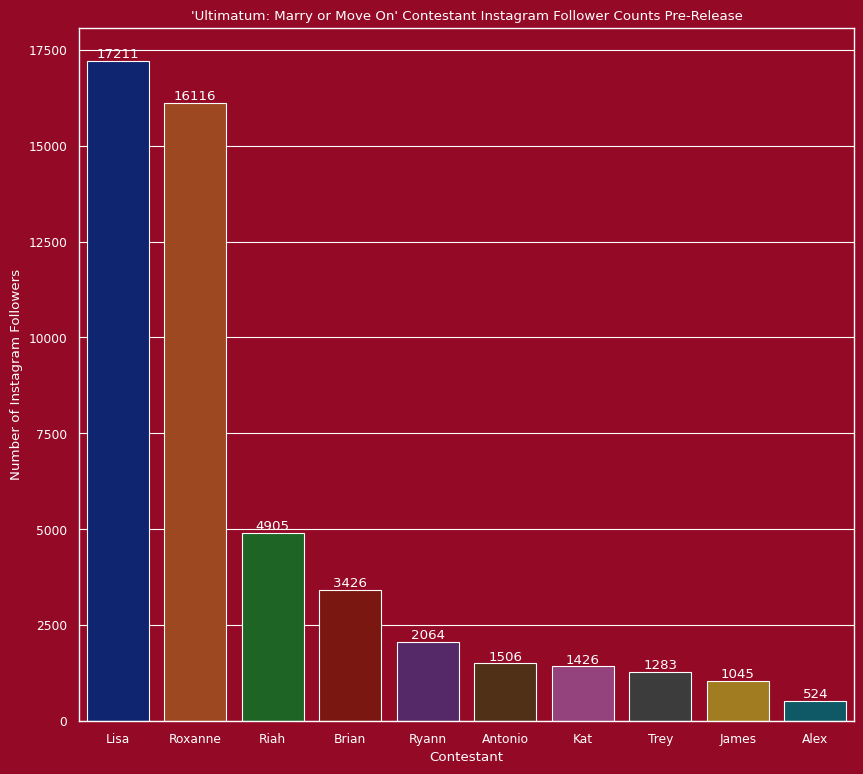

In [110]:
plt.figure(figsize=(10,9))
sns.set_context("paper")


ax = sns.barplot(preshow_df[['Name','preshow_count']].sort_values('preshow_count', ascending = False), x= 'Name', y='preshow_count')
plt.title("'Ultimatum: Marry or Move On' Contestant Instagram Follower Counts Pre-Release")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of Instagram Followers")

for i in ax.containers:
    ax.bar_label(i,)


#First 12 Hours

In [111]:
#let's read in our data:
from google.colab import drive
drive.mount('/content/drive')

# Read in the csv file
first12_df = pd.read_csv('/content/drive/My Drive/Python/Ultimatum (Marry or Move On) S2/first12_ultimatum_MoMO_S02.txt',
                       sep=';',
                       na_values=[' ','  '])

#getting rid of commas in numerical strings to change them to floats later
first12_df.replace(',','',regex=True,inplace=True)

#list(daily_df)[1:] #why was this here????

#changing strings to numbers
first12_df[list(first12_df)[1:]]=first12_df[list(first12_df)[1:]].astype(float)

#get rid of spaces in the column names
first12_df.columns = first12_df.columns.str.replace(' ', '')

#use Time as the index. Time indicates hours since episodes were dropped
first12_df.set_index('Time', inplace = True)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
first12_contestants_df=first12_df.drop('ultimatum',axis=1)

In [113]:
first12_contestants_df

,Lisa,Brian,James,Ryann,Trey,Riah,Kat,Alex,Antonio,Roxanne
Time,,,,,,,,,,
0,17217.0,3430.0,1047.0,2069.0,1294.0,4913.0,1434.0,532.0,1514.0,16125.0
1,17217.0,3430.0,1047.0,2070.0,1294.0,4914.0,1436.0,531.0,1514.0,16126.0
2,17222.0,3433.0,1049.0,2075.0,1298.0,4918.0,1438.0,534.0,1516.0,16129.0
3,17236.0,3444.0,1051.0,2081.0,1301.0,4926.0,1441.0,536.0,1519.0,16140.0
4,17249.0,3453.0,1052.0,2084.0,1307.0,4932.0,1441.0,536.0,1521.0,16147.0
5,17271.0,3463.0,1054.0,2094.0,1310.0,4937.0,1444.0,539.0,1523.0,16159.0
6,17291.0,3478.0,1060.0,2103.0,1325.0,4945.0,1452.0,548.0,1529.0,16172.0
7,17322.0,3500.0,1064.0,2118.0,1336.0,4960.0,1460.0,552.0,1540.0,16194.0
8,17352.0,3523.0,1074.0,2145.0,1353.0,4970.0,1468.0,557.0,1554.0,16215.0


<Axes: xlabel='Time', ylabel='Lisa'>

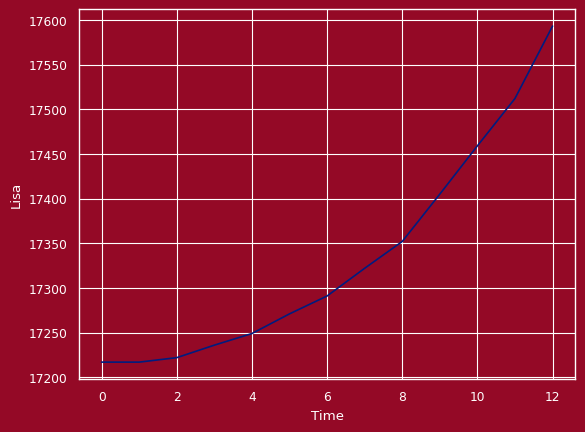

In [114]:
sns.lineplot(data=first12_contestants_df['Lisa'])

<Axes: xlabel='Time', ylabel='Brian'>

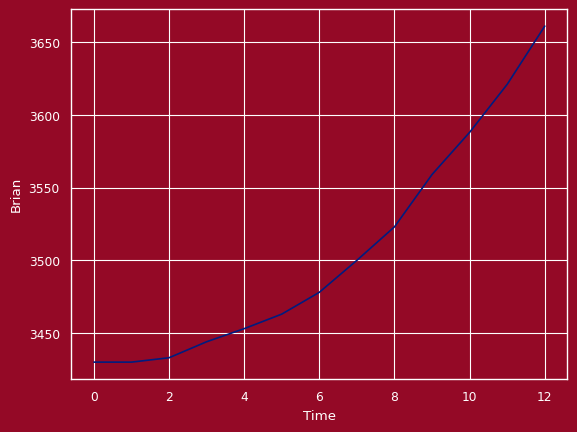

In [115]:
sns.lineplot(data=first12_contestants_df['Brian'])

In [116]:
df2 = pd.DataFrame({'Name': [name for name in first12_contestants_df.columns],
                           'change' : [(first12_contestants_df[name][12]-df[name][-1]) for name in first12_contestants_df.columns]})

In [117]:
df2

,Name,change
0,Lisa,382.0
1,Brian,235.0
2,James,88.0
3,Ryann,242.0
4,Trey,190.0
5,Riah,182.0
6,Kat,119.0
7,Alex,90.0
8,Antonio,145.0
9,Roxanne,283.0


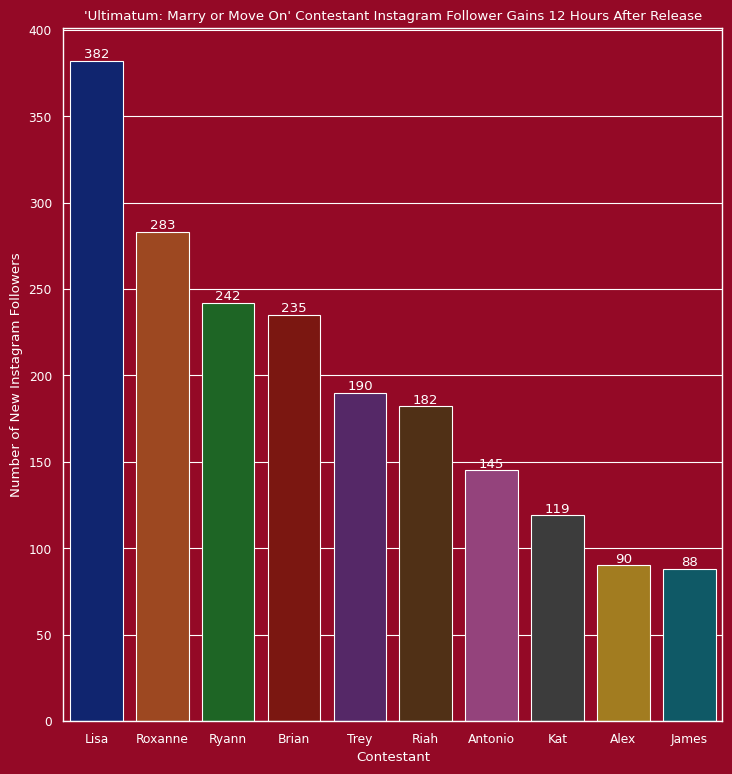

In [118]:
plt.figure(figsize=(8.5,9))
sns.set_context("paper")


ax = sns.barplot(df2[['Name','change']].sort_values('change', ascending = False), x= 'Name', y='change')
plt.title("'Ultimatum: Marry or Move On' Contestant Instagram Follower Gains 12 Hours After Release")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of New Instagram Followers")

for i in ax.containers:
    ax.bar_label(i,)


#First 24 Hours

In [119]:
# Read in the csv file
first24_df = pd.read_csv('/content/drive/My Drive/Python/Ultimatum (Marry or Move On) S2/first24_ultimatum_MoMO_s02.txt',
                       sep=';',
                       skipinitialspace=True,
                       parse_dates=['DateTime'],
                       na_values=[' ','  '])

#getting rid of commas in numerical strings to change them to floats later
first24_df.replace(',','',regex=True,inplace=True)

#get rid of spaces in the column names
daily_df.columns = daily_df.columns.str.replace(' ', '')

#changing strings to numbers
first24_df[list(first24_df)[1:]]=first24_df[list(first24_df)[1:]].astype(float)

#use DateTime as the index
first24_df.set_index('DateTime', inplace = True)

first24_df



,Lisa,Brian,James,Ryann,Trey,Riah,Kat,Alex,Antonio,Roxanne,ultimatum
DateTime,,,,,,,,,,,
2023-08-23 03:00:00,17217.0,3430.0,1047.0,2069.0,1294.0,4913.0,1434.0,532.0,1514.0,16125.0,170371.0
2023-08-23 04:00:00,17217.0,3430.0,1047.0,2070.0,1294.0,4914.0,1436.0,531.0,1514.0,16126.0,170376.0
2023-08-23 05:00:00,17222.0,3433.0,1049.0,2075.0,1298.0,4918.0,1438.0,534.0,1516.0,16129.0,170391.0
2023-08-23 06:00:00,17236.0,3444.0,1051.0,2081.0,1301.0,4926.0,1441.0,536.0,1519.0,16140.0,170408.0
2023-08-23 07:00:00,17249.0,3453.0,1052.0,2084.0,1307.0,4932.0,1441.0,536.0,1521.0,16147.0,170421.0
2023-08-23 08:00:00,17271.0,3463.0,1054.0,2094.0,1310.0,4937.0,1444.0,539.0,1523.0,16159.0,170443.0
2023-08-23 09:00:00,17291.0,3478.0,1060.0,2103.0,1325.0,4945.0,1452.0,548.0,1529.0,16172.0,170466.0
2023-08-23 10:00:00,17322.0,3500.0,1064.0,2118.0,1336.0,4960.0,1460.0,552.0,1540.0,16194.0,170482.0
2023-08-23 11:00:00,17352.0,3523.0,1074.0,2145.0,1353.0,4970.0,1468.0,557.0,1554.0,16215.0,170510.0


In [120]:
first24_df.index

DatetimeIndex(['2023-08-23 03:00:00', '2023-08-23 04:00:00',
               '2023-08-23 05:00:00', '2023-08-23 06:00:00',
               '2023-08-23 07:00:00', '2023-08-23 08:00:00',
               '2023-08-23 09:00:00', '2023-08-23 10:00:00',
               '2023-08-23 11:00:00', '2023-08-23 12:00:00',
               '2023-08-23 13:00:00', '2023-08-23 14:00:00',
               '2023-08-23 15:00:00', '2023-08-23 16:00:00',
               '2023-08-23 17:00:00', '2023-08-23 18:00:00',
               '2023-08-23 19:00:00', '2023-08-23 20:00:00',
               '2023-08-23 21:00:00', '2023-08-23 22:00:00',
               '2023-08-23 23:00:00', '2023-08-24 00:00:00',
               '2023-08-24 01:00:00', '2023-08-24 02:00:00',
               '2023-08-24 03:00:00'],
              dtype='datetime64[ns]', name='DateTime', freq=None)

In [121]:
first24_contestants_df=first24_df.drop('ultimatum',axis=1)

<Axes: xlabel='DateTime'>

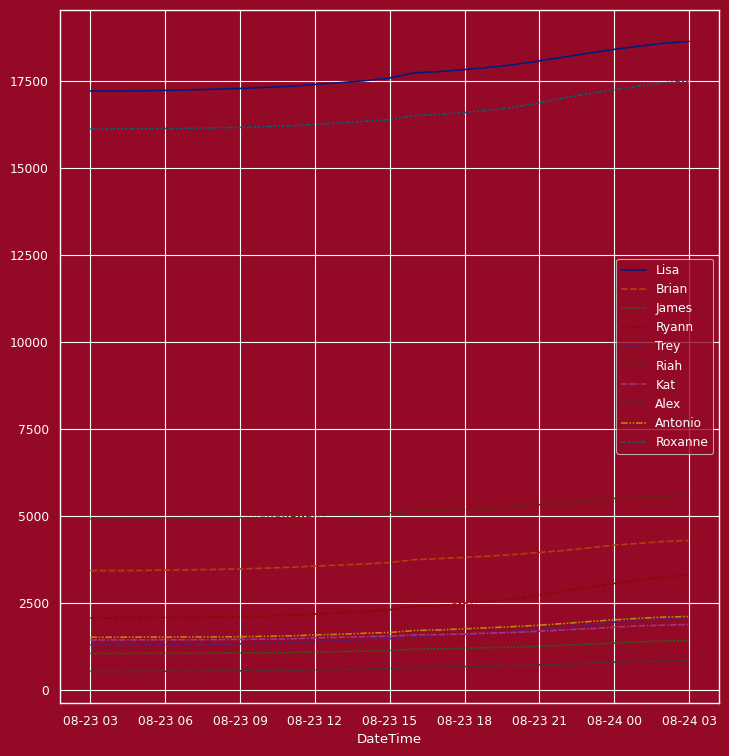

In [122]:
plt.figure(figsize=(8.5,9))
sns.set_context("paper")
sns.lineplot(data=first24_contestants_df)

In [123]:
hourly_raw_change_df = pd.DataFrame(
    {name: [first24_contestants_df[name][i+1]-first24_contestants_df[name][i]
            for i in range(24)] for name in first24_contestants_df.columns})

In [124]:
hourly_raw_change_df

,Lisa,Brian,James,Ryann,Trey,Riah,Kat,Alex,Antonio,Roxanne
0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,-1.0,0.0,1.0
1,5.0,3.0,2.0,5.0,4.0,4.0,2.0,3.0,2.0,3.0
2,14.0,11.0,2.0,6.0,3.0,8.0,3.0,2.0,3.0,11.0
3,13.0,9.0,1.0,3.0,6.0,6.0,0.0,0.0,2.0,7.0
4,22.0,10.0,2.0,10.0,3.0,5.0,3.0,3.0,2.0,12.0
5,20.0,15.0,6.0,9.0,15.0,8.0,8.0,9.0,6.0,13.0
6,31.0,22.0,4.0,15.0,11.0,15.0,8.0,4.0,11.0,22.0
7,30.0,23.0,10.0,27.0,17.0,10.0,8.0,5.0,14.0,21.0
8,53.0,36.0,17.0,37.0,36.0,38.0,28.0,18.0,26.0,45.0
9,54.0,29.0,12.0,34.0,26.0,29.0,17.0,12.0,19.0,39.0


In [125]:
changes_first24_df = pd.DataFrame({'Name': [name for name in first24_contestants_df.columns],
                           'change' : [(first24_contestants_df[name][-1]-first24_contestants_df[name][0]) for name in first24_contestants_df.columns]})

In [126]:
changes_first24_df.set_index('Name')

,change
Name,
Lisa,1426.0
Brian,866.0
James,369.0
Ryann,1241.0
Trey,779.0
Riah,690.0
Kat,450.0
Alex,311.0
Antonio,596.0


##Couples

###Lisa & Brian

Text(0, 0.5, 'Number of Instagram Followers')

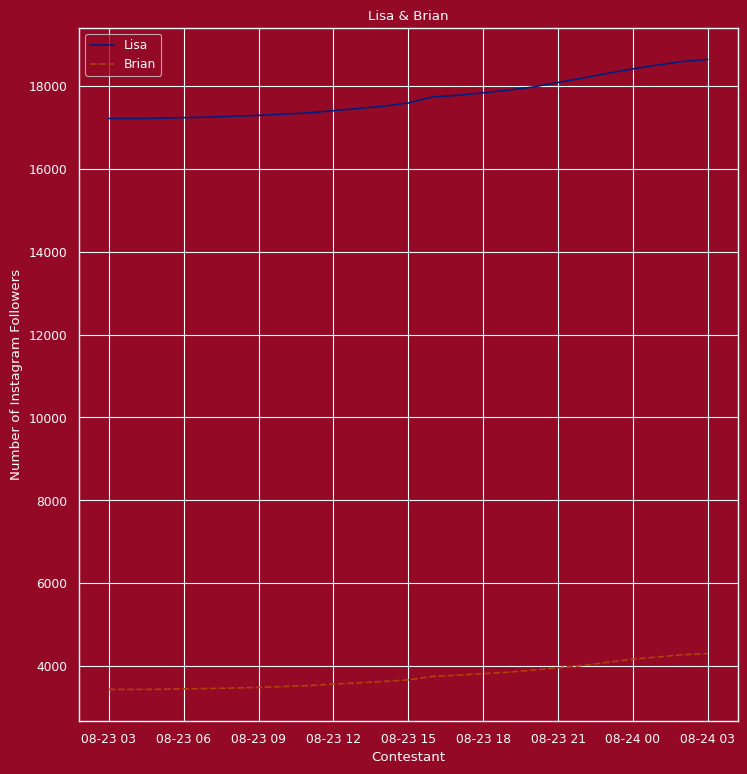

In [127]:
plt.figure(figsize=(8.5,9))
sns.set_context("paper")

ax = sns.lineplot(data=first24_contestants_df[['Lisa','Brian']])

plt.title("Lisa & Brian")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of Instagram Followers")

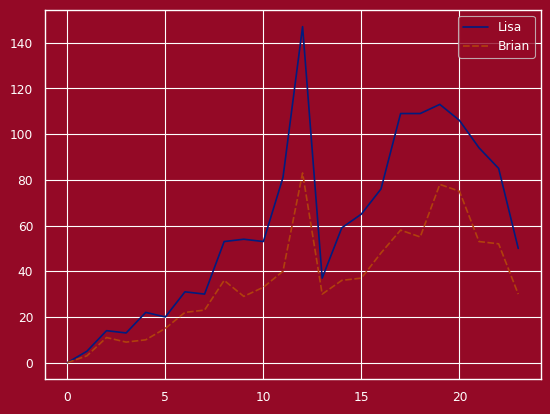

In [128]:
ax = sns.lineplot(data=hourly_raw_change_df[['Lisa','Brian']])


<Axes: xlabel='Lisa', ylabel='Brian'>

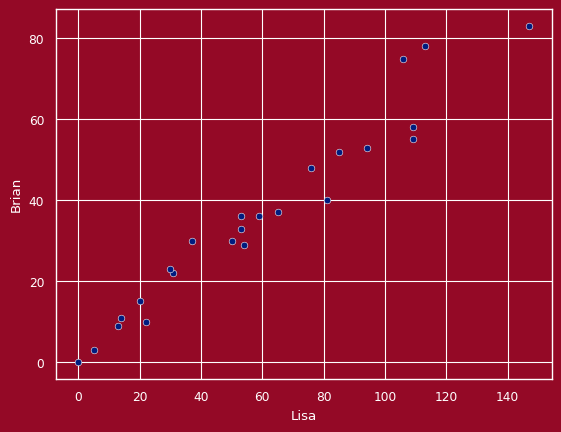

In [129]:
sns.scatterplot(x=hourly_raw_change_df['Lisa'],y=hourly_raw_change_df['Brian'])

###Kat & Alex

Text(0, 0.5, 'Number of Instagram Followers')

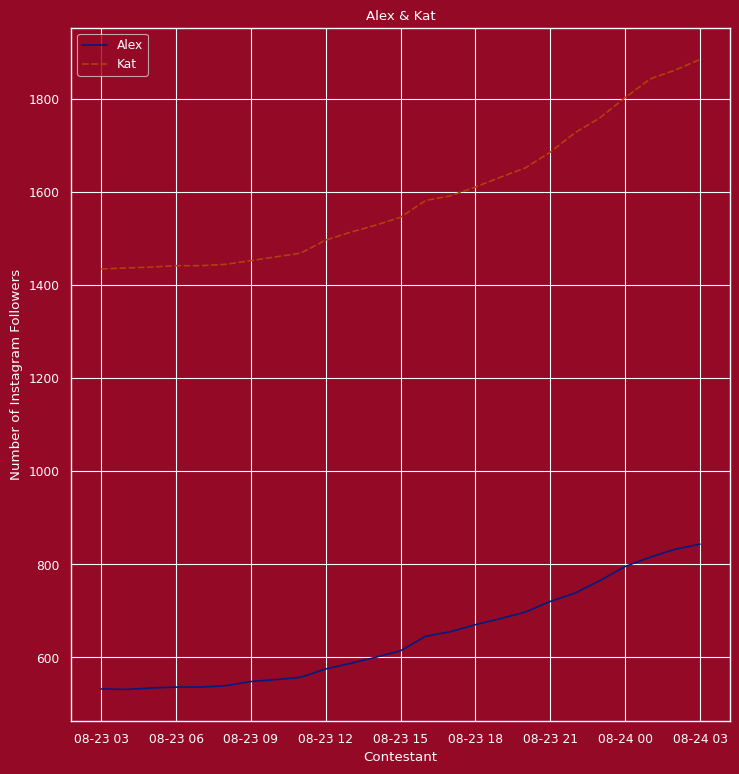

In [130]:
plt.figure(figsize=(8.5,9))
sns.set_context("paper")

ax = sns.lineplot(data=first24_contestants_df[['Alex','Kat']])

plt.title("Alex & Kat")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of Instagram Followers")

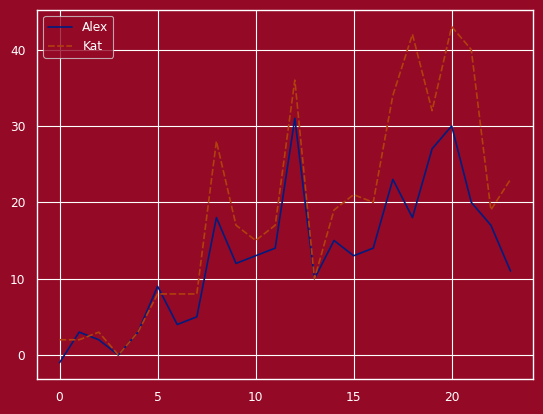

In [131]:
ax = sns.lineplot(data=hourly_raw_change_df[['Alex','Kat']])


<Axes: xlabel='Kat', ylabel='Alex'>

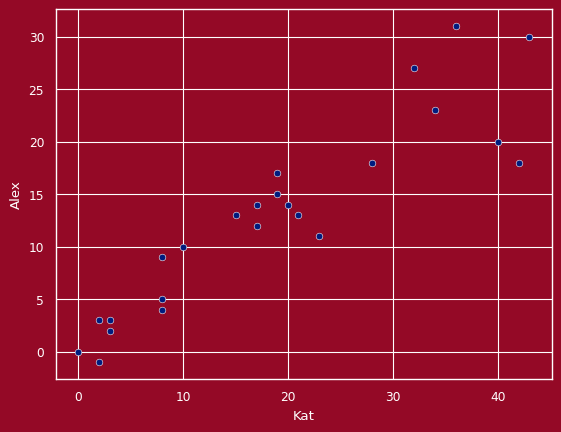

In [132]:
sns.scatterplot(x=hourly_raw_change_df['Kat'],y=hourly_raw_change_df['Alex'])

###Ryann & James

Text(0, 0.5, 'Number of Instagram Followers')

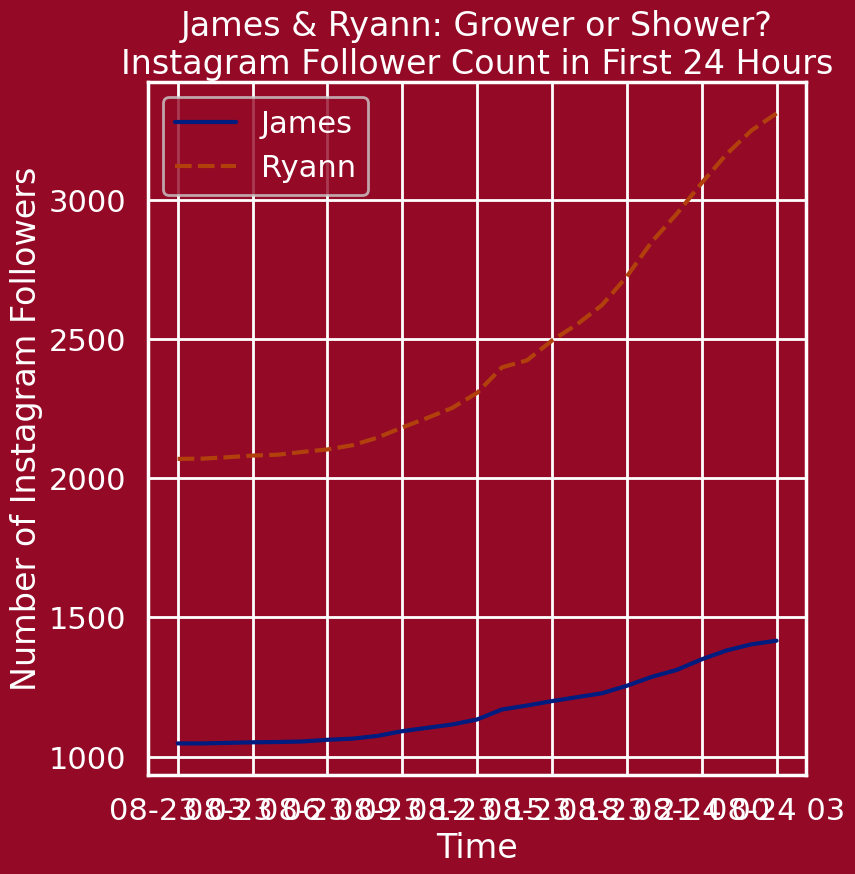

In [133]:
plt.figure(figsize=(8.5,9))
sns.set_context("poster")

ax = sns.lineplot(data=first24_contestants_df[['James','Ryann']])

plt.title("James & Ryann: Grower or Shower?\nInstagram Follower Count in First 24 Hours")
ax.set_xlabel("Time")
ax.set_ylabel("Number of Instagram Followers")

<Axes: xlabel='Ryann', ylabel='James'>

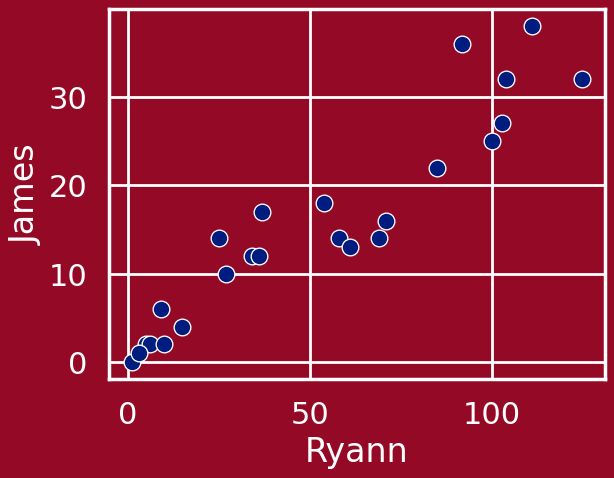

In [134]:
sns.scatterplot(x=hourly_raw_change_df['Ryann'],y=hourly_raw_change_df['James'])

In [135]:
ryann_james_changes = changes_first24_df.loc[changes_first24_df.Name.isin(['Ryann','James'])]
ryann_james_changes

,Name,change
2,James,369.0
3,Ryann,1241.0


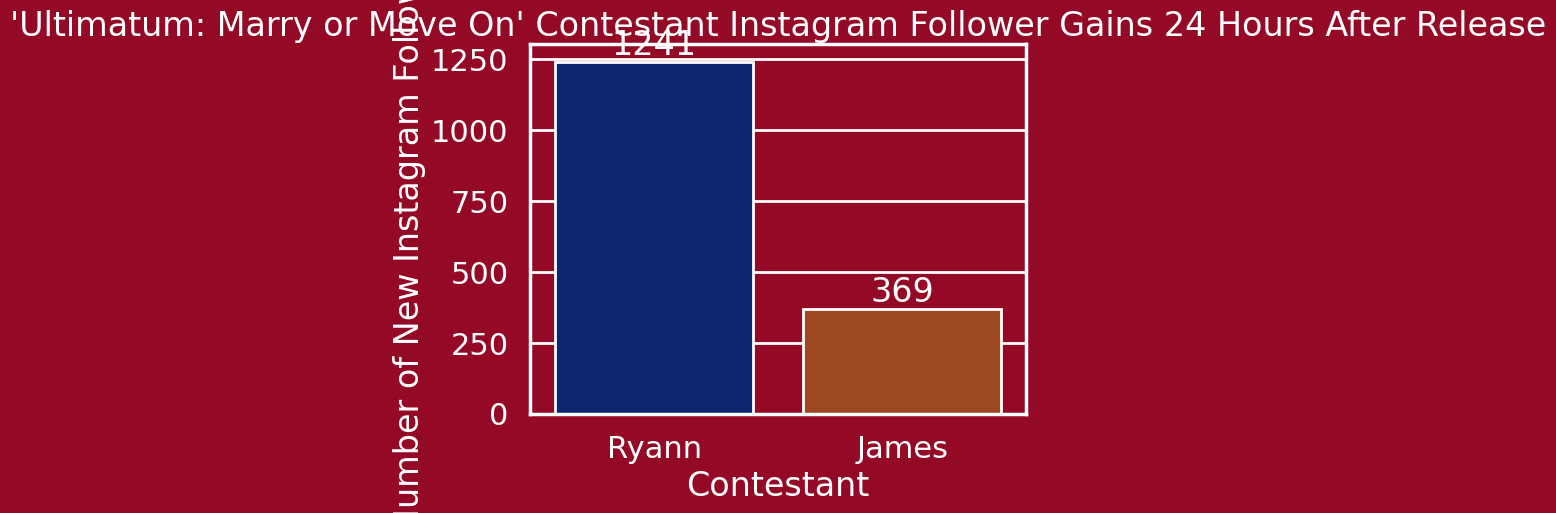

In [136]:
ax = sns.barplot(ryann_james_changes[['Name','change']].sort_values('change', ascending = False),x= 'Name', y='change')
plt.title("'Ultimatum: Marry or Move On' Contestant Instagram Follower Gains 24 Hours After Release")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of New Instagram Followers")

for i in ax.containers:
    ax.bar_label(i,)


###Roxanne & Antonio

Text(0, 0.5, 'Number of Instagram Followers')

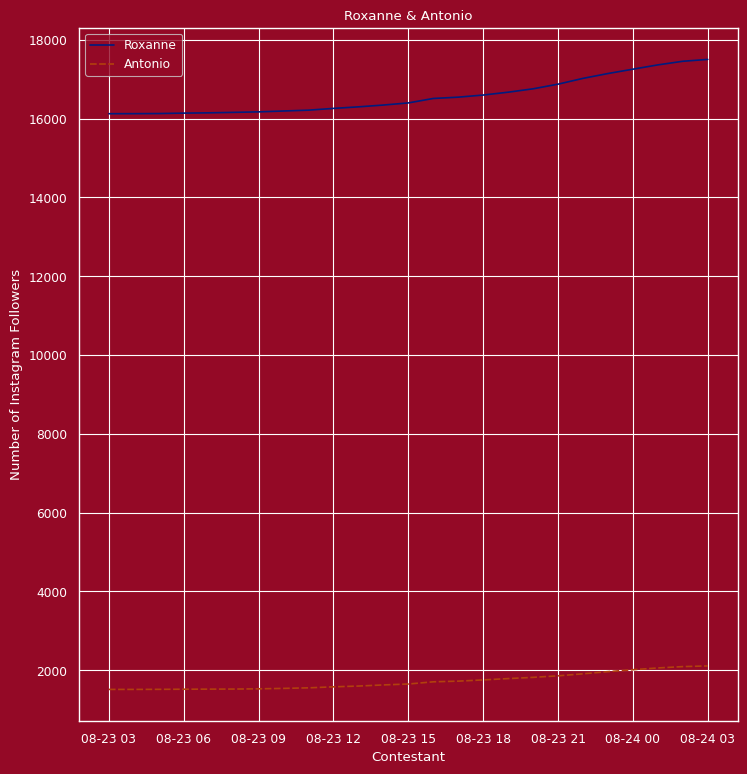

In [137]:
plt.figure(figsize=(8.5,9))
sns.set_context("paper")

ax = sns.lineplot(data=first24_contestants_df[['Roxanne','Antonio']])

plt.title("Roxanne & Antonio")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of Instagram Followers")

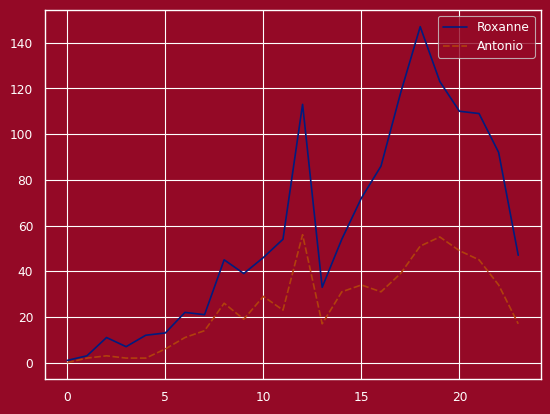

In [138]:
ax = sns.lineplot(data=hourly_raw_change_df[['Roxanne','Antonio']])


<Axes: xlabel='Roxanne', ylabel='Antonio'>

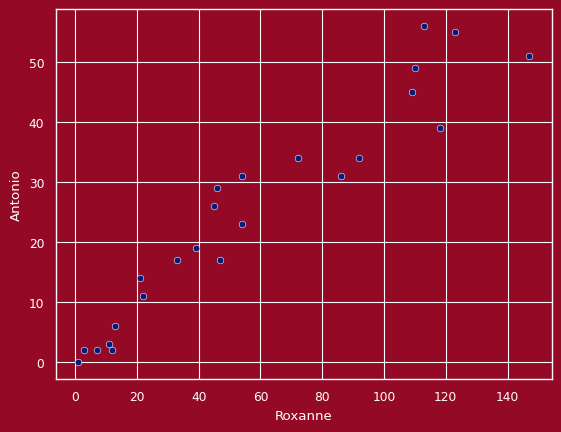

In [139]:
sns.scatterplot(x=hourly_raw_change_df['Roxanne'],y=hourly_raw_change_df['Antonio'])

###Riah & Trey

Text(0, 0.5, 'Number of Instagram Followers')

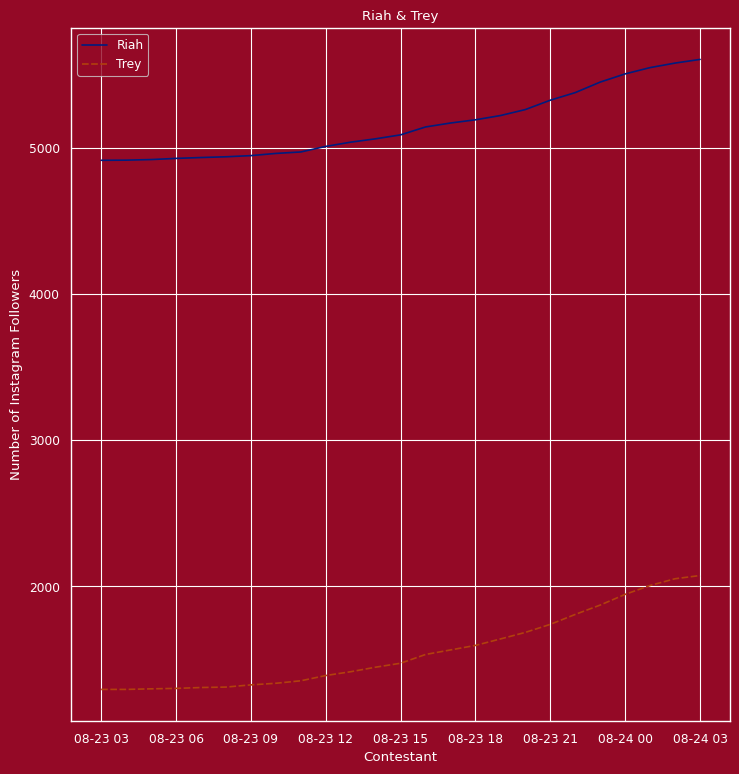

In [140]:
plt.figure(figsize=(8.5,9))
sns.set_context("paper")

ax = sns.lineplot(data=first24_contestants_df[['Riah','Trey']])

plt.title("Riah & Trey")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of Instagram Followers")

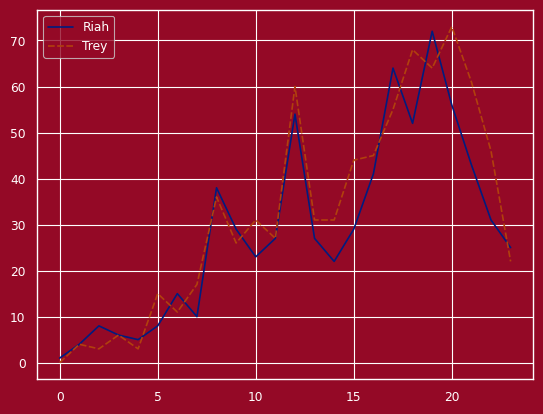

In [141]:
ax = sns.lineplot(data=hourly_raw_change_df[['Riah','Trey']])


<Axes: xlabel='Riah', ylabel='Trey'>

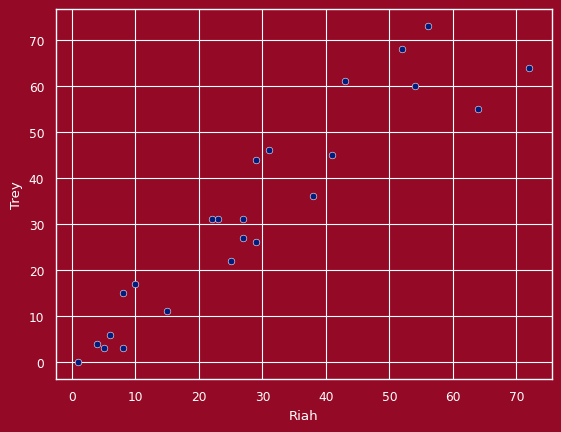

In [142]:
sns.scatterplot(x=hourly_raw_change_df['Riah'],y=hourly_raw_change_df['Trey'])

##All Contestants

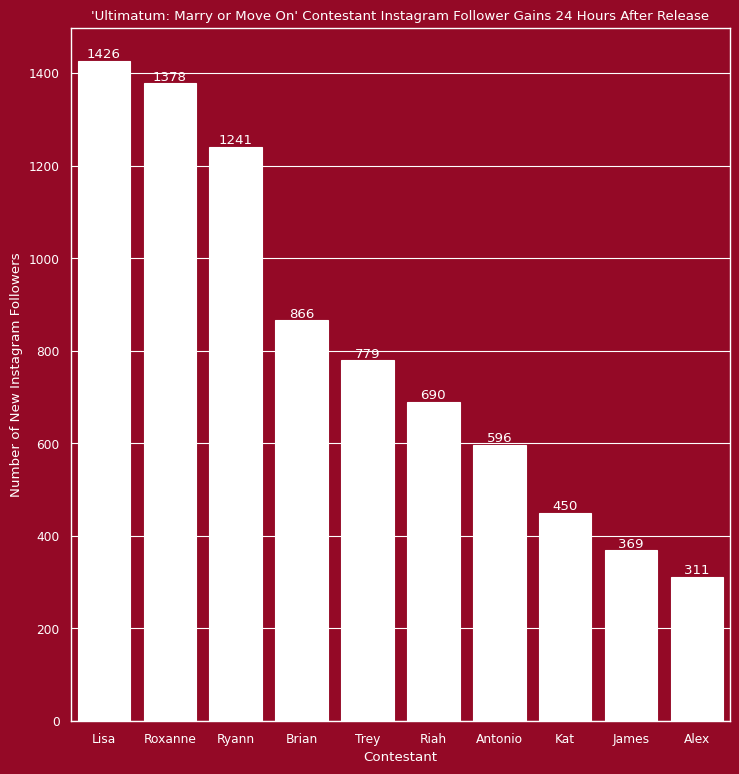

In [143]:
plt.figure(figsize=(8.5,9))
sns.set_context("paper")


ax = sns.barplot(changes_first24_df[['Name','change']].sort_values('change', ascending = False), x= 'Name', y='change', palette=['white'])
plt.title("'Ultimatum: Marry or Move On' Contestant Instagram Follower Gains 24 Hours After Release")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of New Instagram Followers")

for i in ax.containers:
    ax.bar_label(i,)


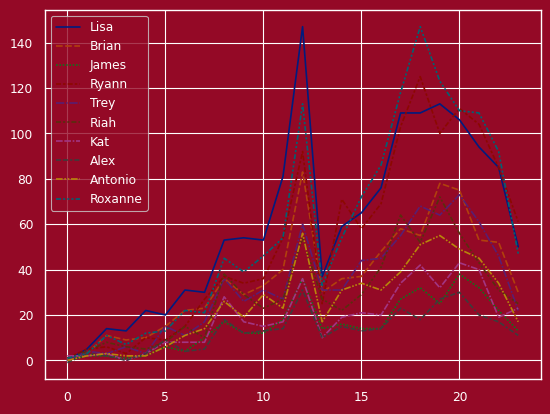

In [144]:
ax = sns.lineplot(data=hourly_raw_change_df)


#Ryann & James: Grower or Shower

<ipython-input-145-00493865928d>:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=first24_contestants_df[['Ryann','James']], palette=['white'])


''

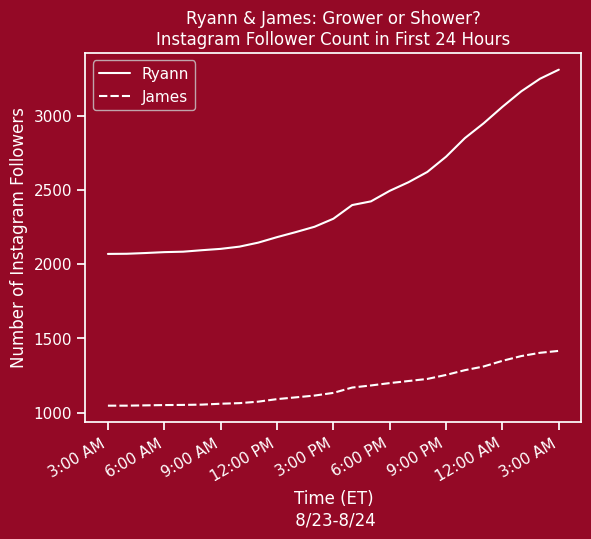

<Figure size 720x720 with 0 Axes>

In [145]:

#plt.figure(figsize=(9,9))
sns.set_context("poster")
sns.set(rc={'axes.facecolor':'#940926',
            'figure.facecolor':'#940926',
            'lines.color':'white'
            , 'text.color':'white'
            , 'axes.labelcolor':'white'
            , 'xtick.color':'white'
            , 'ytick.color':'white'})
ax = sns.lineplot(data=first24_contestants_df[['Ryann','James']], palette=['white'])

plt.title("Ryann & James: Grower or Shower?\nInstagram Follower Count in First 24 Hours")
ax.set_xlabel("Time (ET)\n 8/23-8/24")
ax.set_ylabel("Number of Instagram Followers")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-I:%M %p'))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.grid(False)
ax.tick_params(bottom=True, left=True)
figure(figsize=(9, 9), dpi=80)
;

<ipython-input-146-068803b1cd91>:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=hourly_raw_change_df[['Ryann','James']], palette=['white'])


<Figure size 720x720 with 0 Axes>

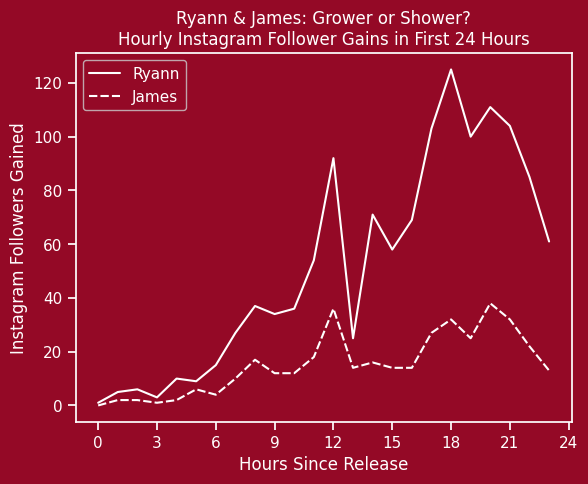

<Figure size 720x720 with 0 Axes>

In [146]:


#plt.figure(figsize=(9,9))
sns.set_context("poster")
sns.set(rc={'axes.facecolor':'#940926',
            'figure.facecolor':'#940926',
            'lines.color':'white'
            , 'text.color':'white'
            , 'axes.labelcolor':'white'
            , 'xtick.color':'white'
            , 'ytick.color':'white'})
ax = sns.lineplot(data=hourly_raw_change_df[['Ryann','James']], palette=['white'])
plt.title("Ryann & James: Grower or Shower?\nHourly Instagram Follower Gains in First 24 Hours")
ax.set_xlabel("Hours Since Release")
ax.set_ylabel("Instagram Followers Gained")
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%-I:%M %p'))
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.grid(False)
plt.xticks(np.arange(0, 25, 3.0))

ax.tick_params(bottom=True, left=True)
plt.figure(figsize=(9, 9), dpi=80)


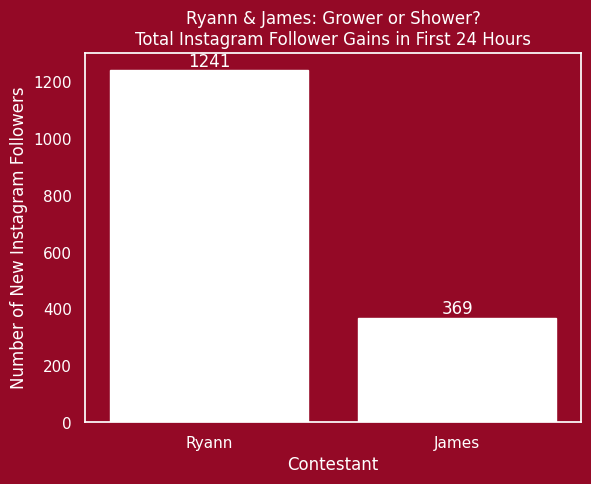

In [147]:
sns.set_context("poster")
sns.set(rc={'axes.facecolor':'#940926',
            'figure.facecolor':'#940926',
            'lines.color':'white'
            , 'text.color':'white'
            , 'axes.labelcolor':'white'
            , 'xtick.color':'white'
            , 'ytick.color':'white'})

ax = sns.barplot(ryann_james_changes[['Name','change']].sort_values('change', ascending = False)
,x= 'Name'
, y='change'
, palette=['white'])
plt.title("Ryann & James: Grower or Shower?\nTotal Instagram Follower Gains in First 24 Hours")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of New Instagram Followers")
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i,)


#All Contestants for SM

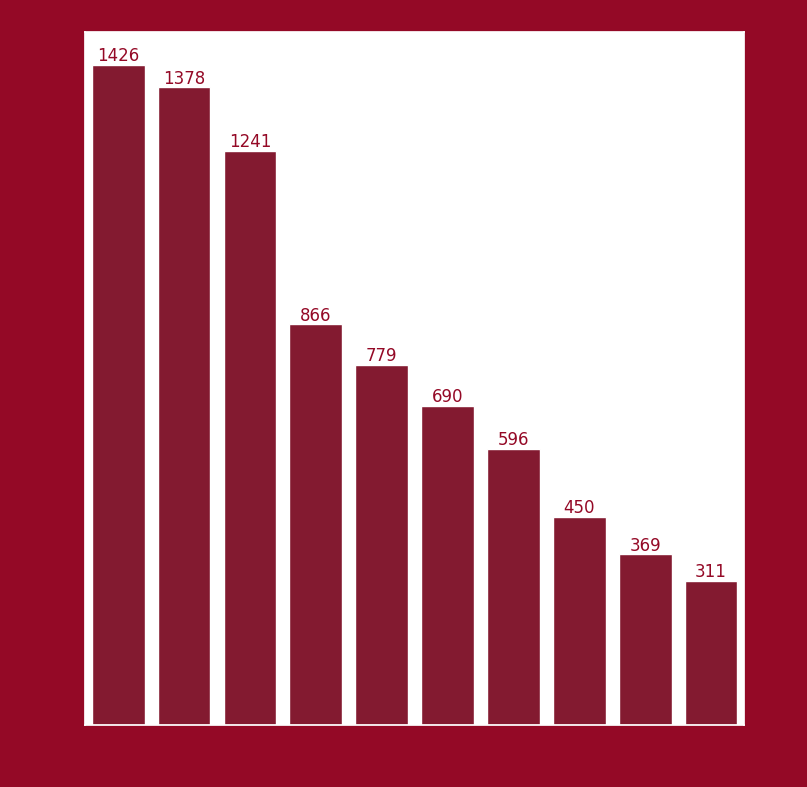

In [148]:
plt.figure(figsize=(8.5,9))
sns.set_context("paper")

sns.set(rc={'axes.facecolor':'white',
            'figure.facecolor':'white',
            'lines.color':'#940926'
            , 'text.color':'#940926'
            , 'axes.labelcolor':'#940926'
            , 'xtick.color':'#940926'
            , 'ytick.color':'#940926'})

ax = sns.barplot(changes_first24_df[['Name','change']].sort_values('change', ascending = False), x= 'Name', y='change', palette=['#940926'])
plt.title("'Ultimatum: Marry or Move On' Contestant Instagram Follower Gains 24 Hours After Release")
ax.set_xlabel("Contestant")
ax.set_ylabel("Number of New Instagram Followers")

for i in ax.containers:
    ax.bar_label(i,)
